# Statistics

CanoPyHydro provides access to a wealth of data regarding tree canopies. 

To make these statistics more accessable, they may be calculated in bulk via the 'statistics' function. \
The function is called below, and definitions for the statistics can be found in the Glossary. 

In [1]:
# This function 
import os

os.environ["CANOPYHYDRO_CONFIG"] = "./canopyhydro_config.toml"
from canopyhydro.CylinderCollection import CylinderCollection

# Initializing a CylinderCollection object
myCollection = CylinderCollection()

# Converting a specified file to a CylinderCollection object
myCollection.from_csv("5_SmallTree.csv")

# Requesting an plot of the tree projected onto the XY plane (birds-eye view)
myCollection.project_cylinders("XY")

# creating the digraph model
myCollection.initialize_digraph_from()

stat_file = myCollection.statistics()

# Will generate a file with all of the statisics listed below 
# total_psa
# psa_w_overlap
# stem_psa
# stem_psa_w_overlap
# tot_surface_area
# stem_surface_area
# tot_hull_area
# tot_hull_boundary
# stem_hull_area

# stem_hull_boundary
# num_drip_points
# max_bo
# topQuarterTotPsa
# topHalfTotPsa
# topThreeQuarterTotPsa
# TotalShade
# top_quarter_shade
# top_half_shade
# top_three_quarter_shade
# DBH
# volume
# X_max
# Y_max
# Z_max
# X_min
# Y_min
# Z_min
# Order_zero_angle_avg
# Order_zero_angle_std
# Order_one_angle_avg
# Order_one_angle_std
# Order_two_angle_avg
# Order_two_angle_std
# Order_three_angle_avg
# Order_three_angle_std
# order_gr_four_angle_avg
# order_gr_four_angle_std

2024.10.14 21:18:19.499 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing <_io.TextIOWrapper name='./data/input/5_SmallTree.csv' mode='r' encoding='UTF-8'>

2024.10.14 21:18:19.535 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - ./data/input/5_SmallTree.csv initialized with 517 cylinders

2024.10.14 21:18:19.539 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into XY axis begun for file 5_SmallTree.csv

2024.10.14 21:18:21.362 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into XY axis complete for file 5_SmallTree.csv

2024.10.14 21:18:21.915 |MainThread   | INFO    | CylinderCollection.py:769 - find_flow_components() | model - 5_SmallTree.csv found to have 70 drip components

reached_End of find flows


2024.10.14 21:18:22.034 |MainThread   | INFO    | CylinderCollection.py:996 -           statistics() | model - Found hull alpha shape stats

2024.10.14 21:18:22.400 |MainThread   | INFO    | CylinderCollection.py:1016 -           statistics() | model - found projected areas

2024.10.14 21:18:23.113 |MainThread   | INFO    | utils.py:150 -            save_file() | model - [['total_psa', 'psa_w_overlap', 'stem_psa', 'stem_psa_w_overlap', 'tot_surface_area', 'stem_surface_area', 'tot_hull_area', 'tot_hull_boundary', 'stem_hull_area', 'stem_hull_boundary', 'num_drip_points', 'max_bo', 'topQuarterTotPsa', 'topHalfTotPsa', 'topThreeQuarterTotPsa', 'TotalShade', 'top_quarter_shade', 'top_half_shade', 'top_three_quarter_shade', 'DBH', 'volume', 'X_max', 'Y_max', 'Z_max', 'X_min', 'Y_min', 'Z_min', 'Order_zero_angle_avg', 'Order_zero_angle_std', 'Order_one_angle_avg', 'Order_one_angle_std', 'Order_two_angle_avg', 'Order_two_angle_std', 'Order_three_angle_avg', 'Order_three_angle_std', 'order_gr_four_angle_avg', 'order_gr_four_angle_std', 'file_name']]

2024.10.14 21:18:23.121 |MainThread   | INFO    | utils.py:177 -            save_file() | model - attempting to write to ./data/output//statistics/5_SmallTree__statistics.csv

In addition to this bulk function, some individual statistics can be found using a variety of dedicated functions. A few such funcitons are shown below.

In [3]:
# Identifying flow information (covered later)
myCollection.find_flow_components()
myCollection.calculate_flows(plane='XY')

# Identifying the overlap of branches at various heights/depths in the canopy
print(myCollection.find_overlap_by_percentile(plane = 'XY'))
print(myCollection.find_overlap_by_percentile(plane = 'XY',percentiles=[33,66,99]))
print(myCollection.find_overlap_by_percentile(plane = 'XZ',percentiles=[10,20,30,70]))

# Diameter at breast height
print(myCollection.get_dbh())


2024.10.14 21:18:46.444 |MainThread   | INFO    | CylinderCollection.py:769 - find_flow_components() | model - 5_SmallTree.csv found to have 70 drip components

reached_End of find flows
{25: {'sum_area': 0.03185684182767693, 'effective_area': 0.029894983741628172, 'internal_overlap': 0.0019618580860487587, 'overlap_with_previous': 0.029894983741628172}, 50: {'sum_area': 0.029130503264231784, 'effective_area': 0.027960517250591167, 'internal_overlap': 0.0011699860136406177, 'overlap_with_previous': 0.027960517250591167}, 75: {'sum_area': 0.029862028471880096, 'effective_area': 0.02854408983609465, 'internal_overlap': 0.0013179386357854463, 'overlap_with_previous': 0.028544089836094647}}
{33: {'sum_area': 0.04205788206106595, 'effective_area': 0.03938659205799218, 'internal_overlap': 0.00267129000307377, 'overlap_with_previous': 0.03938659205799218}, 66: {'sum_area': 0.038149333485791935, 'effective_area': 0.03639941352493353, 'internal_overlap': 0.0017499199608584023, 'overlap_with_previous': 0.03639941352493353}, 99: {'sum_area': 0.03757534277917172, 'effective_area': 0.03516864948497811, 'internal_overlap': 0.0024066932941936084, 'overlap_wi

Though many statistics do not have functions used to calculate them directly. Many are readily accessible. \
Browsing through the larger 'statistics' function and the 'calculate_flows_function' can show users methods for finding a variety of summary statistics. 

In [5]:
# Finding the total projected area 
# from 'statistics'
import numpy as np
from canopyhydro.geometry import unary_union
twod_polys = myCollection.pSV
projection_of_all_branches = unary_union(twod_polys)
projected_area_without_overlap = projection_of_all_branches.area

# Finding the sum of all cylinder projected areas
xy_projected_area= np.sum([cyl.projected_data['XY']["area"]
                                for cyl in myCollection.cylinders]
                        )
xz_projected_area= np.sum([cyl.projected_data['XZ']["area"]
                                for cyl in myCollection.cylinders]
                        )
total_volume= np.sum([cyl.volume
                                for cyl in myCollection.cylinders]
                        )
print(f'{xy_projected_area=}, {xz_projected_area=}, {total_volume=}')

xy_projected_area=16.612411399042763, xz_projected_area=9.643371487823918, total_volume=3.9067559999999997


# Flow Statistics

For additional details on finding flow attributes, see [Flow Identification](flow_identification_drawing.ipynb). \
The main output of the calculate flows function is the 'flows' attribute, which is added to myCollection and is populated with flow statistics (See below).

In [6]:
# printing the first 20 flows found 
myCollection.flows[0:20]

[Flow(num_cylinders=216.0, projected_area=16.51706021532694, surface_area=19.495074988550606, angle_sum=180.03288665020426, volume=3.9062960000000007, sa_to_vol=83646.49652248439, drip_node_id=0.0, drip_node_loc=(-0.299115, 2.537844, -0.598273)),
 Flow(num_cylinders=2, projected_area=0.0005597565466076131, surface_area=0.001924052712727801, angle_sum=-0.8861661864942612, volume=2e-06, sa_to_vol=1924.052712727801, drip_node_id=148, drip_node_loc=(1.736771, 2.700067, 14.216883)),
 Flow(num_cylinders=4, projected_area=0.0012679984136685896, surface_area=0.0043875954238933096, angle_sum=-1.1103646559240672, volume=4.9999999999999996e-06, sa_to_vol=3681.4517891642977, drip_node_id=150, drip_node_loc=(1.476039, 2.744678, 14.221036)),
 Flow(num_cylinders=1, projected_area=0.00026175097799692134, surface_area=0.0008268043545717619, angle_sum=0.20259148846207123, volume=1e-06, sa_to_vol=826.8043545717619, drip_node_id=159, drip_node_loc=(1.298384, 2.459679, 14.389457)),
 Flow(num_cylinders=3, p


The first element of the above array is always stemflow. The other flows are all drip flows (those that contribute to through fall) and are listed in no particular order. \
Note also that each flow has a 'drip_node_loc' (drip node location) listed for each flow. This attribute refers to the x,y and z coordinates of the point at which a flow drops off of a branch to the ground. 

In addition to defining 'myCollection.flows', the above functions set the attribute 'is_stem' for each cylinder. \
By using 'is_stem', we can isolate the stemflow generating portion of the tree. 

2024.10.14 21:19:27.690 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

2024.10.14 21:19:27.904 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

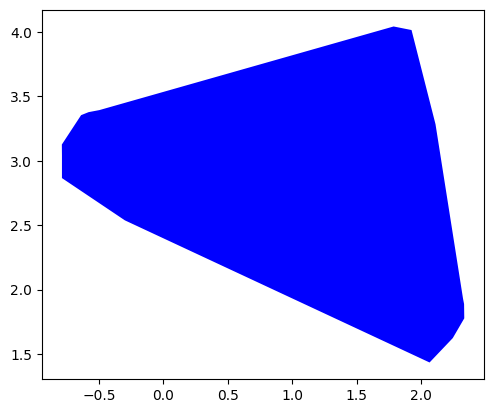

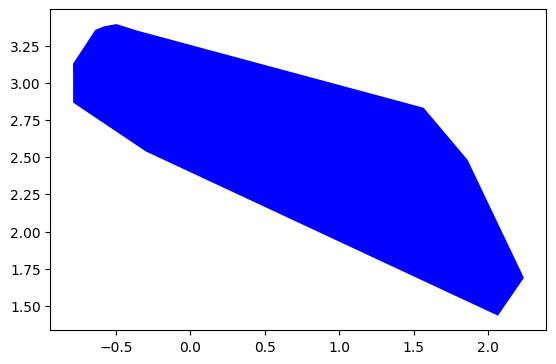

In [7]:
whole_tree_hull,_ = myCollection.watershed_boundary(
    plane="XY",
    curvature_alpha=0.15,
    draw=True,
)

# plotting the boundary of the stemflow generating portion alone
stem_flow_hull,_ = myCollection.watershed_boundary(
    plane="XY",
    curvature_alpha=0.15,
    filter_lambda=lambda: is_stem ,
    draw=True,
)

In doing so, we can calculate statistics for only the subset of cylinders that contribute to stemflow.

In [8]:
# Demonstrating how statistics can be generated from hul objects
print(type(stem_flow_hull))

print('Whole Tree Coverage Area:')
print(whole_tree_hull.area)

print('Stem Flow Coverage Area:')
print(stem_flow_hull.area)


print('')

print('Whole Tree Coverage Bounds:')
print(whole_tree_hull.bounds)

print('Stem Flow Coverage Bounds:')
print(stem_flow_hull.bounds)

print('')

# Demonstrating how is_stem might be used in other calculations 
total_volume= np.sum([cyl.volume
                                for cyl in myCollection.cylinders
                                if cyl.is_stem]
                        )

<class 'shapely.geometry.polygon.Polygon'>
Whole Tree Coverage Area:
4.828740395823999
Stem Flow Coverage Area:
2.66555606734

Whole Tree Coverage Bounds:
(-0.788937, 1.434109, 2.336527, 4.043691)
Stem Flow Coverage Bounds:
(-0.788937, 1.434109, 2.241708, 3.394286)



For detailed definitions of all of the statistics availible to users, see the [Glossary](../glossary.rst)